# 4. Train ConvNN Model: Regression Method


In the following steps, you will: 

- Load the brown dwarf dataset used to train the ML models
- Prepare the X and y variables to deploy the trained ML models
- Visualize them for few cases

We will need the following modules from `TelescopeML`:

- *DeepBuilder*: to prepare the syntheric brown dwarf dataset, load the trained machine learning (ML) models
- *Predictor*: to prepare the observatinal brown dwarf dataset and deploy the trained ML models
- *StatVisAnalyzer*: provide statistical-test and plotting function  
- *IO_utils*: provide functions to load the trained ML models

In [1]:
from TelescopeML.DataMaster import *
from TelescopeML.DeepTrainer import *
from TelescopeML.Predictor import *
from TelescopeML.IO_utils import load_or_dump_trained_model_CNN
from TelescopeML.StatVisAnalyzer import *

No Bottleneck unit testing available.


Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...

## 3.1 Data Preperation 

### 3.1.1 Load the Synthetic spectra - training dataset

We computed a low-resolution spectrum ($R$=200) utilizing atmopshric brown dwarfs grid model, [*Sonora-Bobcat*](https://arxiv.org/pdf/2107.07434.pdf) for spectral range $\sim$0.9-2.4 $\mu m$. An open-source atmospheric radiative transfer Python package, [*PICASO*](https://natashabatalha.github.io/picaso/) was employed for generating these datasets. This dataset encompass 30,888 synthetic spectra (or instances or rows). 

Each spectrum has 104 features (or wavelengths in the astrophysics context, i.e., 0.897, 0.906, ..., 2.512~$\mu$m) and 4 parameters:
- gravity ( log$g$ ) 
- temperature ( T$_{eff}$ )
- carbon-to-oxygen ratio ( C/O )
- metallicity ( [M/H] )

In [2]:
# Read the `TelescopeML_reference_data` path

import os  # to check the path  

__reference_data_path__ = os.getenv("TelescopeML_reference_data")
__reference_data_path__

'/Users/egharibn/RESEARCH/ml/projects/TelescopeML_project/reference_data/'

 Load the dataset and check few instances 

In [3]:
train_BD = pd.read_csv(os.path.join(__reference_data_path__, 
                                    'training_datasets', 
                                    'browndwarf_R100_v4_newWL_v2.csv.bz2'), compression='bz2')
train_BD.head(5)

,gravity,temperature,c_o_ratio,metallicity,2.512,2.487,2.462,2.438,2.413,2.389,...,0.971,0.962,0.952,0.943,0.933,0.924,0.915,0.906,0.897,is_augmented
0,5.0,1100,0.25,-1.0,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08,no
1,5.0,1100,0.25,-0.7,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08,no
2,5.0,1100,0.25,-0.5,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08,no
3,5.0,1100,0.25,-0.3,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08,no
4,5.0,1100,0.25,0.0,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08,no


### 3.1.2 Check atmospheric parameters

- gravity ( log$g$ ) 
- temperature ( T$_{eff}$ )
- carbon-to-oxygen ratio ( C/O )
- metallicity ( [M/H] )

Note: one of the columns, *is_augmented*, is indicating whether this is a native dataset or an augmented one. let's just ignore it for now!

In [4]:
target_features = ['gravity', 'temperature', 'c_o_ratio', 'metallicity']
train_BD[target_features].head()

,gravity,temperature,c_o_ratio,metallicity
0,5.0,1100,0.25,-1.0
1,5.0,1100,0.25,-0.7
2,5.0,1100,0.25,-0.5
3,5.0,1100,0.25,-0.3
4,5.0,1100,0.25,0.0


In [5]:
# training_features_labels: they are Wavelengths variables in string format

training_features_labels = [item for item in train_BD.columns.to_list() if item not in target_features+['is_augmented']]
training_features_labels[:5]

['2.512', '2.487', '2.462', '2.438', '2.413']

In [6]:
# training_features_wl: they are Wavelengths variables 

training_features_wl = [float(item) for item in train_BD.columns.to_list() if item not in target_features+['is_augmented']]
training_features_wl[:5]

[2.512, 2.487, 2.462, 2.438, 2.413]

In [7]:
wl_synthetic = pd.read_csv(os.path.join(__reference_data_path__, 
                                        'training_datasets', 
                                        'wl.csv'))
wl_synthetic.head(3)

,wl
0,2.511960
1,2.486966
2,2.462220


### 3.1.3 Prepare Inputs and outputs for ML models (X,y)
- X: 104 column variables or fluxes
- y: output variables: 'gravity', 'temperature',  'c_o_ratio', 'metallicity'

Note: one of the columns, *is_augmented*, is indicating whether this is a native dataset or an augmented one. let's just ignore it for now!


In [8]:
# to assure we are only training the module with the native non-augmented BD training dataset
train_BD = train_BD[train_BD['is_augmented'].isin(['no'])] 


# Training feature variables
X = train_BD.drop(
    columns=['gravity', 
             'temperature', 
             'c_o_ratio', 
             'metallicity', 
             'is_augmented'])#.astype(np.float32)


# Target/Output feature variables
y = train_BD[['gravity', 'c_o_ratio', 'metallicity', 'temperature', ]]#.astype(np.float32)


log-transform the 'temperature' variable toreduce the skewness of the data, making it more symmetric and normal-like for the ML model


In [9]:
y.loc[:, 'temperature'] = np.log10(y['temperature'])

In [10]:
# check the output variables
y.head()

,gravity,c_o_ratio,metallicity,temperature
0,5.0,0.25,-1.0,3.041393
1,5.0,0.25,-0.7,3.041393
2,5.0,0.25,-0.5,3.041393
3,5.0,0.25,-0.3,3.041393
4,5.0,0.25,0.0,3.041393


---

## 3.2 Build the CNN model and Processing the Data

Here we instintiate BuildRegressorCNN class from DeepBuilder module to prepare the datasets and take the trained CNN (Convolutional Neural Networks) for us:

- Take the synthetic datasets
- Process them, e.g.
    - Divide them to three sets: train, validation, and test sets
    - Scale y variables
    - Scale X variables
    - Create new features 
    

### 3.2.1 Instintiate BuildRegressorCNN class from DeepBuilder module

In [11]:
trained_Data_Processor = DataProcessor( 
                             feature_values=X.to_numpy(),
                             feature_names=X.columns,
                             target_values=y.to_numpy(),
                             target_name=['gravity', 'c_o_ratio', 'metallicity', 'temperature'],
                             is_tuned='yes',
                             param_grid=None,
                             spectral_resolution=100,
                             is_feature_improved='no',
                             is_augmented='no',
                             ml_model=None,
                             ml_model_str='CNN',
                                )

### 3.2.2 Split the dataset into train, validate and test sets

In [12]:
trained_Data_Processor.split_train_validation_test(test_size=0.1, 
                                                 val_size=0.1, 
                                                 random_state_=100,)

### 3.2.3 Standardize X Variables Row-wise 

In [13]:
# Scale the X features using MinMax Scaler
trained_Data_Processor.standardize_X_row_wise()

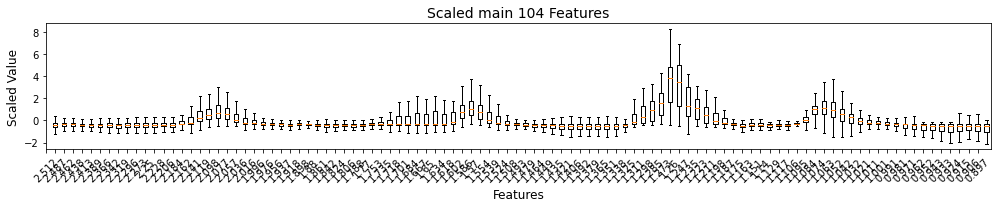

In [14]:
trained_Data_Processor.plot_boxplot_scaled_features(scaled_feature= trained_Data_Processor.X_train_standardized_rowwise, 
                                                  xticks_list = training_features_labels,
                                                  title = 'Scaled main 104 Features',
                                                  fig_size=(14, 3),
                                                    )

### 3.2.4 Standardize y Variables Column-wise 

In [15]:
# Standardize the y features using Standard Scaler
trained_Data_Processor.standardize_y_column_wise()

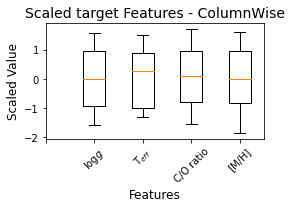

In [16]:
trained_Data_Processor.plot_boxplot_scaled_features(scaled_feature= trained_Data_Processor.y_train_standardized_columnwise, 
                                                  xticks_list = ['','$\log g$', 'T$_{eff}$', 'C/O ratio', '[M/H]'],
                                                  title = 'Scaled target Features - ColumnWise',
                                                  fig_size=(4, 3),
                                                    )

### 3.2.5 Feature engeenering: Take Min and Max of each row (BD spectra) 

In [17]:
# train
trained_Data_Processor.X_train_min = trained_Data_Processor.X_train.min(axis=1)
trained_Data_Processor.X_train_max = trained_Data_Processor.X_train.max(axis=1)

# validation
trained_Data_Processor.X_val_min = trained_Data_Processor.X_val.min(axis=1)
trained_Data_Processor.X_val_max = trained_Data_Processor.X_val.max(axis=1)

# test
trained_Data_Processor.X_test_min = trained_Data_Processor.X_test.min(axis=1)
trained_Data_Processor.X_test_max = trained_Data_Processor.X_test.max(axis=1)

In [18]:
df_MinMax_train = pd.DataFrame((trained_Data_Processor.X_train_min, trained_Data_Processor.X_train_max)).T
df_MinMax_val = pd.DataFrame((trained_Data_Processor.X_val_min, trained_Data_Processor.X_val_max)).T
df_MinMax_test = pd.DataFrame((trained_Data_Processor.X_test_min, trained_Data_Processor.X_test_max)).T

In [19]:
df_MinMax_train.rename(columns={0:'min', 1:'max'}, inplace=True)

In [20]:
df_MinMax_train.head()

,min,max
0,2.984493e-18,4.560593e-11
1,6.833671e-15,2.317328e-09
2,2.870361e-14,5.564836e-09
3,5.696652e-19,5.071436e-11
4,1.321553e-10,1.636513e-07


### 3.2.6 Scale Min Max features - ColumnWise

In [21]:
trained_Data_Processor.standardize_X_column_wise(
                                                X_train = df_MinMax_train.to_numpy(),
                                                X_val   = df_MinMax_val.to_numpy(),
                                                X_test  = df_MinMax_test.to_numpy(),
                                                )

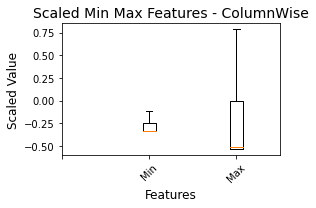

In [22]:
trained_Data_Processor.plot_boxplot_scaled_features(scaled_feature= trained_Data_Processor.X_test_standardized_columnwise, 
                                                  xticks_list = ['','Min','Max'],
                                                  title = 'Scaled Min Max Features - ColumnWise',
                                                  fig_size=(4, 3),
                                                    )

## 3.3 Train CNN model

### 3.3.1 Instintiate *TrainRegressorCNN* class from *DeepTrainer* Module

In [23]:
train_cnn_model = TrainRegressorCNN(
            # input dataset: StandardScaled instances  
            X1_train = trained_Data_Processor.X_train_standardized_rowwise,
            X1_val   = trained_Data_Processor.X_val_standardized_rowwise,
            X1_test  = trained_Data_Processor.X_test_standardized_rowwise,

            # input dataset: Min Max of each instance  
            X2_train = trained_Data_Processor.X_train_standardized_columnwise,
            X2_val   = trained_Data_Processor.X_val_standardized_columnwise,
            X2_test  = trained_Data_Processor.X_test_standardized_columnwise,
#             X2_train = trained_Data_Processor.X_train_normalized_columnwise,
#             X2_val   = trained_Data_Processor.X_val_normalized_columnwise,
#             X2_test  = trained_Data_Processor.X_test_normalized_columnwise,

            # 1st target
            y1_train = trained_Data_Processor.y_train_standardized_columnwise[:,0],
            y1_val   = trained_Data_Processor.y_val_standardized_columnwise[:,0],
            y1_test  = trained_Data_Processor.y_test_standardized_columnwise[:,0],

            # 2nd target
            y2_train = trained_Data_Processor.y_train_standardized_columnwise[:,1],
            y2_val   = trained_Data_Processor.y_val_standardized_columnwise[:,1],
            y2_test  = trained_Data_Processor.y_test_standardized_columnwise[:,1],

            # 3rd target
            y3_train = trained_Data_Processor.y_train_standardized_columnwise[:,2],
            y3_val   = trained_Data_Processor.y_val_standardized_columnwise[:,2],
            y3_test  = trained_Data_Processor.y_test_standardized_columnwise[:,2],

            # 4th target
            y4_train = trained_Data_Processor.y_train_standardized_columnwise[:,3],
            y4_val   = trained_Data_Processor.y_val_standardized_columnwise[:,3],
            y4_test  = trained_Data_Processor.y_test_standardized_columnwise[:,3],
            )

### 3.3.2 Define the Hyperparameters

In [24]:
hyperparameters = {'Conv__MaxPooling1D': 2,
                 'Conv__num_blocks': 1,
                 'Conv__num_layers_per_block': 3,
                 'Conv__num_filters': 4,
                 'Conv__kernel_size': 6,
                   
                 'FC2__num_blocks': 4,
                 'FC2_num_layers_per_block': 2,
                 'FC__dropout': 0.0024609140719442646,
                 'FC2__dropout': 64,
                 'FC2__units': 64,
#                  'FC__units_gravity': 16,
#                  'FC__units_metallicity': 256,
#                  'FC__units_temperature': 8,
                   
                 'FC1__num_blocks': 1,
                 'FC1_num_layers_per_block': 4,
                 'FC2__dropout': 0.09889223768186726,
                 'FC1__units': 128,
                 'FC1__dropout': 0.002185843015008406,
                   
                 'learning_rate': 4.9946842008422193e-05}

In [25]:
# hyperparameters = {
#      'Conv__MaxPooling1D': 2,
#      'Conv__num_blocks': 1,
#      'Conv__num_layers_per_block': 3,
#      'Conv__num_filters': 4,
#      'Conv__kernel_size': 6,
#      'FC__NumberLayers': 4,
    
#      'FC1__num_blocks' : 1,
#      'FC1_num_layers_per_block': 2,
#      'FC1__dropout': 0.09889223768186726,
#      'FC1__units': 128,

#      'FC2__num_blocks' : 1,
#      'FC2_num_layers_per_block':2,
#      'FC2__dropout': 0.0024609140719442646,
#      'FC2__units': 64,

    
#      'learning_rate': 4.9946842008422193e-05}

### 3.3.3 Build a CNN model

In [26]:
train_cnn_model.build_model(hyperparameters = hyperparameters, 
                     )

Model: "model"


__________________________________________________________________________________________________


 Layer (type)                Output Shape                 Param #   Connected to                  


 input_1 (InputLayer)        [(None, 104, 1)]             0         []                            


 Conv__B1_L1 (Conv1D)        (None, 104, 16)              112       ['input_1[0][0]']             


 Conv__B1_L2 (Conv1D)        (None, 104, 64)              6208      ['Conv__B1_L1[0][0]']         


 Conv__B1_L3 (Conv1D)        (None, 104, 144)             55440     ['Conv__B1_L2[0][0]']         


 MaxPool1D__B1_L3 (MaxPooli  (None, 52, 144)              0         ['Conv__B1_L3[0][0]']         


 ng1D)                                                                                            


 flatten (Flatten)           (None, 7488)                 0         ['MaxPool1D__B1_L3[0][0]']    


 FC1__B1_L1 (Dense)          (None, 512)                  3834368   ['flatten[0][0]']             


 FC1__B1_L2 (Dense)          (None, 2048)                 1050624   ['FC1__B1_L1[0][0]']          


 FC1__B1_L3 (Dense)          (None, 4608)                 9441792   ['FC1__B1_L2[0][0]']          


 FC1__B1_L4 (Dense)          (None, 8192)                 3775692   ['FC1__B1_L3[0][0]']          


                                                          8                                       


 FC1__Dropout__B1_L4 (Dropo  (None, 8192)                 0         ['FC1__B1_L4[0][0]']          


 ut)                                                                                              


 input_2 (InputLayer)        [(None, 2)]                  0         []                            


 Concatenated_Layer (Concat  (None, 8194)                 0         ['FC1__Dropout__B1_L4[0][0]', 


 enate)                                                              'input_2[0][0]']             


 FC2__B1_L1 (Dense)          (None, 256)                  2097920   ['Concatenated_Layer[0][0]']  


 FC2__B1_L2 (Dense)          (None, 1024)                 263168    ['FC2__B1_L1[0][0]']          


 FC2__Dropout__B1_L2 (Dropo  (None, 1024)                 0         ['FC2__B1_L2[0][0]']          


 ut)                                                                                              


 FC2__B2_L1 (Dense)          (None, 1024)                 1049600   ['FC2__Dropout__B1_L2[0][0]'] 


 FC2__B2_L2 (Dense)          (None, 2304)                 2361600   ['FC2__B2_L1[0][0]']          


 FC2__Dropout__B2_L2 (Dropo  (None, 2304)                 0         ['FC2__B2_L2[0][0]']          


 ut)                                                                                              


 FC2__B3_L1 (Dense)          (None, 2304)                 5310720   ['FC2__Dropout__B2_L2[0][0]'] 


 FC2__B3_L2 (Dense)          (None, 4096)                 9441280   ['FC2__B3_L1[0][0]']          


 FC2__Dropout__B3_L2 (Dropo  (None, 4096)                 0         ['FC2__B3_L2[0][0]']          


 ut)                                                                                              


 FC2__B4_L1 (Dense)          (None, 4096)                 1678131   ['FC2__Dropout__B3_L2[0][0]'] 


                                                          2                                       


 FC2__B4_L2 (Dense)          (None, 6400)                 2622080   ['FC2__B4_L1[0][0]']          


                                                          0                                       


 FC2__Dropout__B4_L2 (Dropo  (None, 6400)                 0         ['FC2__B4_L2[0][0]']          


 ut)                                                                                              


 gravity (Dense)             (None, 1)                    6401      ['FC2__Dropout__B4_L2[0][0]'] 


 c_o_ratio (Dense)           (None, 1)                    6401      ['FC2__Dropout__B4_L2[0][0]'] 


 metallicity (Dense)         (None, 1)                    6401      ['FC2__Dropout__B4_L2[0][0]'] 


 temperature (Dense)         (None, 1)                    6401      ['FC2__Dropout__B4_L2[0][0]'] 


Total params: 115697476 (441.35 MB)


Trainable params: 115697476 (441.35 MB)


Non-trainable params: 0 (0.00 Byte)


__________________________________________________________________________________________________


None


### 3.3.4 Train the CNN model using the datasets

In [27]:
history, model =  train_cnn_model.fit_cnn_model(batch_size=2**11,
                                                budget=4)

Epoch 1/4


 1/13 [=>............................] - ETA: 1:20 - loss: 1.8437 - gravity_loss: 0.4604 - c_o_ratio_loss: 0.4755 - metallicity_loss: 0.4451 - temperature_loss: 0.4627 - gravity_mae: 0.8595 - c_o_ratio_mae: 0.8982 - metallicity_mae: 0.8381 - temperature_mae: 0.8665

 2/13 [===>..........................] - ETA: 41s - loss: 1.8215 - gravity_loss: 0.4609 - c_o_ratio_loss: 0.4687 - metallicity_loss: 0.4425 - temperature_loss: 0.4494 - gravity_mae: 0.8608 - c_o_ratio_mae: 0.8893 - metallicity_mae: 0.8347 - temperature_mae: 0.8502 

 3/13 [=====>........................] - ETA: 37s - loss: 1.7944 - gravity_loss: 0.4597 - c_o_ratio_loss: 0.4660 - metallicity_loss: 0.4400 - temperature_loss: 0.4287 - gravity_mae: 0.8598 - c_o_ratio_mae: 0.8859 - metallicity_mae: 0.8312 - temperature_mae: 0.8225

 4/13 [========>.....................] - ETA: 33s - loss: 1.7689 - gravity_loss: 0.4576 - c_o_ratio_loss: 0.4645 - metallicity_loss: 0.4380 - temperature_loss: 0.4087 - gravity_mae: 0.8575 - c_o_ratio_mae: 0.8845 - metallicity_mae: 0.8296 - temperature_mae: 0.7953

 5/13 [==========>...................] - ETA: 31s - loss: 1.7269 - gravity_loss: 0.4545 - c_o_ratio_loss: 0.4625 - metallicity_loss: 0.4258 - temperature_loss: 0.3841 - gravity_mae: 0.8543 - c_o_ratio_mae: 0.8818 - metallicity_mae: 0.8151 - temperature_mae: 0.7587

 6/13 [============>.................] - ETA: 28s - loss: 1.6836 - gravity_loss: 0.4500 - c_o_ratio_loss: 0.4607 - metallicity_loss: 0.4125 - temperature_loss: 0.3605 - gravity_mae: 0.8497 - c_o_ratio_mae: 0.8794 - metallicity_mae: 0.7982 - temperature_mae: 0.7238

 7/13 [===============>..............] - ETA: 24s - loss: 1.6330 - gravity_loss: 0.4471 - c_o_ratio_loss: 0.4574 - metallicity_loss: 0.3952 - temperature_loss: 0.3334 - gravity_mae: 0.8460 - c_o_ratio_mae: 0.8751 - metallicity_mae: 0.7763 - temperature_mae: 0.6840

 8/13 [=================>............] - ETA: 20s - loss: 1.5937 - gravity_loss: 0.4472 - c_o_ratio_loss: 0.4549 - metallicity_loss: 0.3858 - temperature_loss: 0.3057 - gravity_mae: 0.8458 - c_o_ratio_mae: 0.8708 - metallicity_mae: 0.7643 - temperature_mae: 0.6480

 9/13 [===================>..........] - ETA: 16s - loss: 1.5618 - gravity_loss: 0.4454 - c_o_ratio_loss: 0.4505 - metallicity_loss: 0.3789 - temperature_loss: 0.2871 - gravity_mae: 0.8433 - c_o_ratio_mae: 0.8650 - metallicity_mae: 0.7552 - temperature_mae: 0.6241

10/13 [======================>.......] - ETA: 12s - loss: 1.5310 - gravity_loss: 0.4425 - c_o_ratio_loss: 0.4444 - metallicity_loss: 0.3683 - temperature_loss: 0.2758 - gravity_mae: 0.8401 - c_o_ratio_mae: 0.8569 - metallicity_mae: 0.7417 - temperature_mae: 0.6132

11/13 [========================>.....] - ETA: 8s - loss: 1.4953 - gravity_loss: 0.4386 - c_o_ratio_loss: 0.4409 - metallicity_loss: 0.3614 - temperature_loss: 0.2544 - gravity_mae: 0.8356 - c_o_ratio_mae: 0.8525 - metallicity_mae: 0.7331 - temperature_mae: 0.5777 

12/13 [==========================>...] - ETA: 4s - loss: 1.4630 - gravity_loss: 0.4355 - c_o_ratio_loss: 0.4356 - metallicity_loss: 0.3505 - temperature_loss: 0.2413 - gravity_mae: 0.8319 - c_o_ratio_mae: 0.8459 - metallicity_mae: 0.7188 - temperature_mae: 0.5615

13/13 [==============================] - ETA: 0s - loss: 1.4567 - gravity_loss: 0.4350 - c_o_ratio_loss: 0.4343 - metallicity_loss: 0.3494 - temperature_loss: 0.2379 - gravity_mae: 0.8314 - c_o_ratio_mae: 0.8442 - metallicity_mae: 0.7173 - temperature_mae: 0.5559

13/13 [==============================] - 55s 4s/step - loss: 1.4567 - gravity_loss: 0.4350 - c_o_ratio_loss: 0.4343 - metallicity_loss: 0.3494 - temperature_loss: 0.2379 - gravity_mae: 0.8314 - c_o_ratio_mae: 0.8442 - metallicity_mae: 0.7173 - temperature_mae: 0.5559 - val_loss: 0.9605 - val_gravity_loss: 0.3623 - val_c_o_ratio_loss: 0.3217 - val_metallicity_loss: 0.2450 - val_temperature_loss: 0.0315 - val_gravity_mae: 0.7457 - val_c_o_ratio_mae: 0.6984 - val_metallicity_mae: 0.5722 - val_temperature_mae: 0.1957


Epoch 2/4


 1/13 [=>............................] - ETA: 47s - loss: 1.0204 - gravity_loss: 0.3664 - c_o_ratio_loss: 0.3445 - metallicity_loss: 0.2485 - temperature_loss: 0.0611 - gravity_mae: 0.7508 - c_o_ratio_mae: 0.7261 - metallicity_mae: 0.5825 - temperature_mae: 0.2747

 2/13 [===>..........................] - ETA: 44s - loss: 0.9915 - gravity_loss: 0.3632 - c_o_ratio_loss: 0.3292 - metallicity_loss: 0.2374 - temperature_loss: 0.0617 - gravity_mae: 0.7448 - c_o_ratio_mae: 0.7052 - metallicity_mae: 0.5705 - temperature_mae: 0.2762

 3/13 [=====>........................] - ETA: 39s - loss: 0.9674 - gravity_loss: 0.3673 - c_o_ratio_loss: 0.3134 - metallicity_loss: 0.2351 - temperature_loss: 0.0516 - gravity_mae: 0.7493 - c_o_ratio_mae: 0.6858 - metallicity_mae: 0.5693 - temperature_mae: 0.2493

 4/13 [========>.....................] - ETA: 35s - loss: 0.9386 - gravity_loss: 0.3619 - c_o_ratio_loss: 0.2978 - metallicity_loss: 0.2264 - temperature_loss: 0.0525 - gravity_mae: 0.7426 - c_o_ratio_mae: 0.6624 - metallicity_mae: 0.5556 - temperature_mae: 0.2530

 5/13 [==========>...................] - ETA: 31s - loss: 0.9095 - gravity_loss: 0.3556 - c_o_ratio_loss: 0.2820 - metallicity_loss: 0.2214 - temperature_loss: 0.0504 - gravity_mae: 0.7326 - c_o_ratio_mae: 0.6383 - metallicity_mae: 0.5477 - temperature_mae: 0.2484

 6/13 [============>.................] - ETA: 28s - loss: 0.8904 - gravity_loss: 0.3517 - c_o_ratio_loss: 0.2715 - metallicity_loss: 0.2183 - temperature_loss: 0.0490 - gravity_mae: 0.7261 - c_o_ratio_mae: 0.6194 - metallicity_mae: 0.5429 - temperature_mae: 0.2450

 7/13 [===============>..............] - ETA: 24s - loss: 0.8781 - gravity_loss: 0.3510 - c_o_ratio_loss: 0.2621 - metallicity_loss: 0.2164 - temperature_loss: 0.0486 - gravity_mae: 0.7246 - c_o_ratio_mae: 0.6049 - metallicity_mae: 0.5399 - temperature_mae: 0.2463

 8/13 [=================>............] - ETA: 20s - loss: 0.8645 - gravity_loss: 0.3485 - c_o_ratio_loss: 0.2566 - metallicity_loss: 0.2136 - temperature_loss: 0.0459 - gravity_mae: 0.7207 - c_o_ratio_mae: 0.5969 - metallicity_mae: 0.5356 - temperature_mae: 0.2370

 9/13 [===================>..........] - ETA: 16s - loss: 0.8514 - gravity_loss: 0.3439 - c_o_ratio_loss: 0.2499 - metallicity_loss: 0.2113 - temperature_loss: 0.0462 - gravity_mae: 0.7138 - c_o_ratio_mae: 0.5864 - metallicity_mae: 0.5320 - temperature_mae: 0.2383

10/13 [======================>.......] - ETA: 12s - loss: 0.8383 - gravity_loss: 0.3403 - c_o_ratio_loss: 0.2435 - metallicity_loss: 0.2098 - temperature_loss: 0.0448 - gravity_mae: 0.7087 - c_o_ratio_mae: 0.5769 - metallicity_mae: 0.5296 - temperature_mae: 0.2341

11/13 [========================>.....] - ETA: 8s - loss: 0.8261 - gravity_loss: 0.3385 - c_o_ratio_loss: 0.2359 - metallicity_loss: 0.2082 - temperature_loss: 0.0435 - gravity_mae: 0.7067 - c_o_ratio_mae: 0.5659 - metallicity_mae: 0.5277 - temperature_mae: 0.2309 

12/13 [==========================>...] - ETA: 4s - loss: 0.8185 - gravity_loss: 0.3372 - c_o_ratio_loss: 0.2319 - metallicity_loss: 0.2069 - temperature_loss: 0.0425 - gravity_mae: 0.7053 - c_o_ratio_mae: 0.5593 - metallicity_mae: 0.5261 - temperature_mae: 0.2282

13/13 [==============================] - ETA: 0s - loss: 0.8157 - gravity_loss: 0.3366 - c_o_ratio_loss: 0.2305 - metallicity_loss: 0.2064 - temperature_loss: 0.0422 - gravity_mae: 0.7044 - c_o_ratio_mae: 0.5573 - metallicity_mae: 0.5255 - temperature_mae: 0.2273

13/13 [==============================] - 52s 4s/step - loss: 0.8157 - gravity_loss: 0.3366 - c_o_ratio_loss: 0.2305 - metallicity_loss: 0.2064 - temperature_loss: 0.0422 - gravity_mae: 0.7044 - c_o_ratio_mae: 0.5573 - metallicity_mae: 0.5255 - temperature_mae: 0.2273 - val_loss: 0.6517 - val_gravity_loss: 0.2906 - val_c_o_ratio_loss: 0.1463 - val_metallicity_loss: 0.1764 - val_temperature_loss: 0.0384 - val_gravity_mae: 0.6467 - val_c_o_ratio_mae: 0.4319 - val_metallicity_mae: 0.4752 - val_temperature_mae: 0.2277


Epoch 3/4


 1/13 [=>............................] - ETA: 51s - loss: 0.6652 - gravity_loss: 0.3036 - c_o_ratio_loss: 0.1597 - metallicity_loss: 0.1754 - temperature_loss: 0.0266 - gravity_mae: 0.6621 - c_o_ratio_mae: 0.4649 - metallicity_mae: 0.4795 - temperature_mae: 0.1888

 2/13 [===>..........................] - ETA: 43s - loss: 0.6686 - gravity_loss: 0.3026 - c_o_ratio_loss: 0.1557 - metallicity_loss: 0.1815 - temperature_loss: 0.0288 - gravity_mae: 0.6619 - c_o_ratio_mae: 0.4537 - metallicity_mae: 0.4843 - temperature_mae: 0.1954

 3/13 [=====>........................] - ETA: 39s - loss: 0.6606 - gravity_loss: 0.3020 - c_o_ratio_loss: 0.1530 - metallicity_loss: 0.1787 - temperature_loss: 0.0269 - gravity_mae: 0.6600 - c_o_ratio_mae: 0.4493 - metallicity_mae: 0.4820 - temperature_mae: 0.1878

 4/13 [========>.....................] - ETA: 35s - loss: 0.6537 - gravity_loss: 0.3032 - c_o_ratio_loss: 0.1460 - metallicity_loss: 0.1778 - temperature_loss: 0.0266 - gravity_mae: 0.6608 - c_o_ratio_mae: 0.4365 - metallicity_mae: 0.4812 - temperature_mae: 0.1861

 5/13 [==========>...................] - ETA: 32s - loss: 0.6456 - gravity_loss: 0.3011 - c_o_ratio_loss: 0.1424 - metallicity_loss: 0.1762 - temperature_loss: 0.0258 - gravity_mae: 0.6576 - c_o_ratio_mae: 0.4276 - metallicity_mae: 0.4773 - temperature_mae: 0.1828

 6/13 [============>.................] - ETA: 28s - loss: 0.6446 - gravity_loss: 0.3021 - c_o_ratio_loss: 0.1409 - metallicity_loss: 0.1772 - temperature_loss: 0.0244 - gravity_mae: 0.6585 - c_o_ratio_mae: 0.4259 - metallicity_mae: 0.4794 - temperature_mae: 0.1766

 7/13 [===============>..............] - ETA: 24s - loss: 0.6403 - gravity_loss: 0.3013 - c_o_ratio_loss: 0.1399 - metallicity_loss: 0.1751 - temperature_loss: 0.0241 - gravity_mae: 0.6567 - c_o_ratio_mae: 0.4216 - metallicity_mae: 0.4768 - temperature_mae: 0.1752

 8/13 [=================>............] - ETA: 20s - loss: 0.6341 - gravity_loss: 0.3008 - c_o_ratio_loss: 0.1370 - metallicity_loss: 0.1722 - temperature_loss: 0.0242 - gravity_mae: 0.6559 - c_o_ratio_mae: 0.4158 - metallicity_mae: 0.4730 - temperature_mae: 0.1748

 9/13 [===================>..........] - ETA: 16s - loss: 0.6279 - gravity_loss: 0.2985 - c_o_ratio_loss: 0.1341 - metallicity_loss: 0.1716 - temperature_loss: 0.0237 - gravity_mae: 0.6528 - c_o_ratio_mae: 0.4100 - metallicity_mae: 0.4723 - temperature_mae: 0.1725

10/13 [======================>.......] - ETA: 12s - loss: 0.6225 - gravity_loss: 0.2968 - c_o_ratio_loss: 0.1314 - metallicity_loss: 0.1707 - temperature_loss: 0.0235 - gravity_mae: 0.6507 - c_o_ratio_mae: 0.4051 - metallicity_mae: 0.4714 - temperature_mae: 0.1714

11/13 [========================>.....] - ETA: 8s - loss: 0.6172 - gravity_loss: 0.2957 - c_o_ratio_loss: 0.1284 - metallicity_loss: 0.1699 - temperature_loss: 0.0231 - gravity_mae: 0.6492 - c_o_ratio_mae: 0.3997 - metallicity_mae: 0.4701 - temperature_mae: 0.1698 

12/13 [==========================>...] - ETA: 4s - loss: 0.6129 - gravity_loss: 0.2949 - c_o_ratio_loss: 0.1263 - metallicity_loss: 0.1694 - temperature_loss: 0.0223 - gravity_mae: 0.6482 - c_o_ratio_mae: 0.3956 - metallicity_mae: 0.4695 - temperature_mae: 0.1664

13/13 [==============================] - ETA: 0s - loss: 0.6121 - gravity_loss: 0.2948 - c_o_ratio_loss: 0.1260 - metallicity_loss: 0.1690 - temperature_loss: 0.0222 - gravity_mae: 0.6481 - c_o_ratio_mae: 0.3950 - metallicity_mae: 0.4689 - temperature_mae: 0.1661

13/13 [==============================] - 54s 4s/step - loss: 0.6121 - gravity_loss: 0.2948 - c_o_ratio_loss: 0.1260 - metallicity_loss: 0.1690 - temperature_loss: 0.0222 - gravity_mae: 0.6481 - c_o_ratio_mae: 0.3950 - metallicity_mae: 0.4689 - temperature_mae: 0.1661 - val_loss: 0.5382 - val_gravity_loss: 0.2703 - val_c_o_ratio_loss: 0.0906 - val_metallicity_loss: 0.1530 - val_temperature_loss: 0.0244 - val_gravity_mae: 0.6009 - val_c_o_ratio_mae: 0.3255 - val_metallicity_mae: 0.4438 - val_temperature_mae: 0.1812


Epoch 4/4


 1/13 [=>............................] - ETA: 51s - loss: 0.5567 - gravity_loss: 0.2836 - c_o_ratio_loss: 0.0973 - metallicity_loss: 0.1577 - temperature_loss: 0.0181 - gravity_mae: 0.6193 - c_o_ratio_mae: 0.3371 - metallicity_mae: 0.4544 - temperature_mae: 0.1529

 2/13 [===>..........................] - ETA: 47s - loss: 0.5447 - gravity_loss: 0.2763 - c_o_ratio_loss: 0.0962 - metallicity_loss: 0.1557 - temperature_loss: 0.0165 - gravity_mae: 0.6149 - c_o_ratio_mae: 0.3348 - metallicity_mae: 0.4499 - temperature_mae: 0.1459

 3/13 [=====>........................] - ETA: 46s - loss: 0.5349 - gravity_loss: 0.2715 - c_o_ratio_loss: 0.0950 - metallicity_loss: 0.1527 - temperature_loss: 0.0157 - gravity_mae: 0.6089 - c_o_ratio_mae: 0.3330 - metallicity_mae: 0.4463 - temperature_mae: 0.1403

 4/13 [========>.....................] - ETA: 43s - loss: 0.5295 - gravity_loss: 0.2700 - c_o_ratio_loss: 0.0933 - metallicity_loss: 0.1506 - temperature_loss: 0.0155 - gravity_mae: 0.6068 - c_o_ratio_mae: 0.3303 - metallicity_mae: 0.4429 - temperature_mae: 0.1383

 5/13 [==========>...................] - ETA: 38s - loss: 0.5285 - gravity_loss: 0.2687 - c_o_ratio_loss: 0.0938 - metallicity_loss: 0.1508 - temperature_loss: 0.0152 - gravity_mae: 0.6060 - c_o_ratio_mae: 0.3313 - metallicity_mae: 0.4429 - temperature_mae: 0.1371

 6/13 [============>.................] - ETA: 33s - loss: 0.5260 - gravity_loss: 0.2679 - c_o_ratio_loss: 0.0933 - metallicity_loss: 0.1494 - temperature_loss: 0.0154 - gravity_mae: 0.6046 - c_o_ratio_mae: 0.3307 - metallicity_mae: 0.4406 - temperature_mae: 0.1374

 7/13 [===============>..............] - ETA: 28s - loss: 0.5230 - gravity_loss: 0.2656 - c_o_ratio_loss: 0.0935 - metallicity_loss: 0.1486 - temperature_loss: 0.0153 - gravity_mae: 0.6012 - c_o_ratio_mae: 0.3300 - metallicity_mae: 0.4398 - temperature_mae: 0.1369

 8/13 [=================>............] - ETA: 23s - loss: 0.5195 - gravity_loss: 0.2636 - c_o_ratio_loss: 0.0938 - metallicity_loss: 0.1471 - temperature_loss: 0.0150 - gravity_mae: 0.5989 - c_o_ratio_mae: 0.3299 - metallicity_mae: 0.4372 - temperature_mae: 0.1354

 9/13 [===================>..........] - ETA: 18s - loss: 0.5158 - gravity_loss: 0.2616 - c_o_ratio_loss: 0.0934 - metallicity_loss: 0.1461 - temperature_loss: 0.0147 - gravity_mae: 0.5969 - c_o_ratio_mae: 0.3284 - metallicity_mae: 0.4352 - temperature_mae: 0.1333

10/13 [======================>.......] - ETA: 14s - loss: 0.5122 - gravity_loss: 0.2595 - c_o_ratio_loss: 0.0932 - metallicity_loss: 0.1450 - temperature_loss: 0.0146 - gravity_mae: 0.5941 - c_o_ratio_mae: 0.3284 - metallicity_mae: 0.4335 - temperature_mae: 0.1326

11/13 [========================>.....] - ETA: 9s - loss: 0.5108 - gravity_loss: 0.2584 - c_o_ratio_loss: 0.0936 - metallicity_loss: 0.1444 - temperature_loss: 0.0145 - gravity_mae: 0.5928 - c_o_ratio_mae: 0.3290 - metallicity_mae: 0.4326 - temperature_mae: 0.1321 

12/13 [==========================>...] - ETA: 4s - loss: 0.5076 - gravity_loss: 0.2564 - c_o_ratio_loss: 0.0937 - metallicity_loss: 0.1433 - temperature_loss: 0.0143 - gravity_mae: 0.5905 - c_o_ratio_mae: 0.3296 - metallicity_mae: 0.4310 - temperature_mae: 0.1313

13/13 [==============================] - ETA: 0s - loss: 0.5077 - gravity_loss: 0.2566 - c_o_ratio_loss: 0.0936 - metallicity_loss: 0.1433 - temperature_loss: 0.0142 - gravity_mae: 0.5909 - c_o_ratio_mae: 0.3294 - metallicity_mae: 0.4311 - temperature_mae: 0.1311

13/13 [==============================] - 58s 5s/step - loss: 0.5077 - gravity_loss: 0.2566 - c_o_ratio_loss: 0.0936 - metallicity_loss: 0.1433 - temperature_loss: 0.0142 - gravity_mae: 0.5909 - c_o_ratio_mae: 0.3294 - metallicity_mae: 0.4311 - temperature_mae: 0.1311 - val_loss: 0.4277 - val_gravity_loss: 0.2177 - val_c_o_ratio_loss: 0.0728 - val_metallicity_loss: 0.1281 - val_temperature_loss: 0.0090 - val_gravity_mae: 0.5220 - val_c_o_ratio_mae: 0.2875 - val_metallicity_mae: 0.4072 - val_temperature_mae: 0.1040


### 3.3.5 Check the Trained CNN Archeticture and Summary

Checking the architecture of a CNN and its summary is importnat because it provide insights about: 
- Model Design and Structure
- Model complexity
- Hyperparameter Tuning:

In [28]:
trained_Data_Processor.trained_model = model
trained_Data_Processor.history = history

In [29]:
tf.keras.utils.plot_model(
                train_cnn_model.model,
                to_file="model.png",
                show_shapes=True,
                show_dtype=False,
                show_layer_names=True,
                rankdir="TB",
                expand_nested=True,
                dpi=90,
                layer_range=None,
#                 show_layer_activations=False,
)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


### 3.3.6 Trained Model Outcomes

In [30]:
load_or_dump_trained_model_CNN( trained_model = trained_Data_Processor,
                                                        output_indicator='Toy_parameters_v4_1000epoch_v2_test',
                                                        load_or_dump = 'dump')

/usr/local/anaconda3/envs/dl2/lib/python3.9/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## 3.4 Check the performance of the Trained Model

### 3.4.1 Load the Saved Trained CNN Models

In [31]:
loaded_model, history = load_or_dump_trained_model_CNN(output_indicator='Toy_parameters_v4_1000epoch_v2_test',
                                                      load_or_dump = 'load')

In [32]:
train_cnn_model.trained_model = model#loaded_model
train_cnn_model.trained_model_history = history

### 3.4.2 Double-check the Trained CNN Archeticture and Summary

In [33]:
tf.keras.utils.plot_model(
                train_cnn_model.trained_model,
                # to_file="model.png",
                show_shapes=True,
                show_dtype=False,
                show_layer_names=True,
                rankdir="TB",
                expand_nested=True,
                dpi=90,
                layer_range=None,
#                 show_layer_activations=False,
)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [34]:
train_cnn_model.trained_model.summary()

Model: "model"


__________________________________________________________________________________________________


 Layer (type)                Output Shape                 Param #   Connected to                  


 input_1 (InputLayer)        [(None, 104, 1)]             0         []                            


 Conv__B1_L1 (Conv1D)        (None, 104, 16)              112       ['input_1[0][0]']             


 Conv__B1_L2 (Conv1D)        (None, 104, 64)              6208      ['Conv__B1_L1[0][0]']         


 Conv__B1_L3 (Conv1D)        (None, 104, 144)             55440     ['Conv__B1_L2[0][0]']         


 MaxPool1D__B1_L3 (MaxPooli  (None, 52, 144)              0         ['Conv__B1_L3[0][0]']         


 ng1D)                                                                                            


 flatten (Flatten)           (None, 7488)                 0         ['MaxPool1D__B1_L3[0][0]']    


 FC1__B1_L1 (Dense)          (None, 512)                  3834368   ['flatten[0][0]']             


 FC1__B1_L2 (Dense)          (None, 2048)                 1050624   ['FC1__B1_L1[0][0]']          


 FC1__B1_L3 (Dense)          (None, 4608)                 9441792   ['FC1__B1_L2[0][0]']          


 FC1__B1_L4 (Dense)          (None, 8192)                 3775692   ['FC1__B1_L3[0][0]']          


                                                          8                                       


 FC1__Dropout__B1_L4 (Dropo  (None, 8192)                 0         ['FC1__B1_L4[0][0]']          


 ut)                                                                                              


 input_2 (InputLayer)        [(None, 2)]                  0         []                            


 Concatenated_Layer (Concat  (None, 8194)                 0         ['FC1__Dropout__B1_L4[0][0]', 


 enate)                                                              'input_2[0][0]']             


 FC2__B1_L1 (Dense)          (None, 256)                  2097920   ['Concatenated_Layer[0][0]']  


 FC2__B1_L2 (Dense)          (None, 1024)                 263168    ['FC2__B1_L1[0][0]']          


 FC2__Dropout__B1_L2 (Dropo  (None, 1024)                 0         ['FC2__B1_L2[0][0]']          


 ut)                                                                                              


 FC2__B2_L1 (Dense)          (None, 1024)                 1049600   ['FC2__Dropout__B1_L2[0][0]'] 


 FC2__B2_L2 (Dense)          (None, 2304)                 2361600   ['FC2__B2_L1[0][0]']          


 FC2__Dropout__B2_L2 (Dropo  (None, 2304)                 0         ['FC2__B2_L2[0][0]']          


 ut)                                                                                              


 FC2__B3_L1 (Dense)          (None, 2304)                 5310720   ['FC2__Dropout__B2_L2[0][0]'] 


 FC2__B3_L2 (Dense)          (None, 4096)                 9441280   ['FC2__B3_L1[0][0]']          


 FC2__Dropout__B3_L2 (Dropo  (None, 4096)                 0         ['FC2__B3_L2[0][0]']          


 ut)                                                                                              


 FC2__B4_L1 (Dense)          (None, 4096)                 1678131   ['FC2__Dropout__B3_L2[0][0]'] 


                                                          2                                       


 FC2__B4_L2 (Dense)          (None, 6400)                 2622080   ['FC2__B4_L1[0][0]']          


                                                          0                                       


 FC2__Dropout__B4_L2 (Dropo  (None, 6400)                 0         ['FC2__B4_L2[0][0]']          


 ut)                                                                                              


 gravity (Dense)             (None, 1)                    6401      ['FC2__Dropout__B4_L2[0][0]'] 


 c_o_ratio (Dense)           (None, 1)                    6401      ['FC2__Dropout__B4_L2[0][0]'] 


 metallicity (Dense)         (None, 1)                    6401      ['FC2__Dropout__B4_L2[0][0]'] 


 temperature (Dense)         (None, 1)                    6401      ['FC2__Dropout__B4_L2[0][0]'] 


Total params: 115697476 (441.35 MB)


Trainable params: 115697476 (441.35 MB)


Non-trainable params: 0 (0.00 Byte)


__________________________________________________________________________________________________


### 3.4.3  Check the training history through *Loss* metric

In [35]:
plot_model_loss(history = train_cnn_model.trained_model_history,
                title = 'RandState=100: X:StandRow, y:StandCol - MinMax:StandCol, ToyCNNmodel')

### 3.4.4 Plot the Performance of the trained CNN models - Regression metrics
- Plot predicted against actual scatter plots for all parameters 
- Plot Residual histograms (predicted - Actual)
- Report regression metrics: R$^2$ and skewness for training and test sets

In [36]:
train_cnn_model

  1/782 [..............................] - ETA: 2:41

  2/782 [..............................] - ETA: 39s 

  3/782 [..............................] - ETA: 40s

  4/782 [..............................] - ETA: 41s

  5/782 [..............................] - ETA: 40s

  6/782 [..............................] - ETA: 40s

  7/782 [..............................] - ETA: 40s

  8/782 [..............................] - ETA: 40s

  9/782 [..............................] - ETA: 40s

 10/782 [..............................] - ETA: 40s

 11/782 [..............................] - ETA: 40s

 13/782 [..............................] - ETA: 39s

 15/782 [..............................] - ETA: 39s

 17/782 [..............................] - ETA: 39s

 18/782 [..............................] - ETA: 39s

 20/782 [..............................] - ETA: 38s

 21/782 [..............................] - ETA: 38s

 23/782 [..............................] - ETA: 38s

 24/782 [..............................] - ETA: 39s

 25/782 [..............................] - ETA: 39s

 26/782 [..............................] - ETA: 39s

 27/782 [>.............................] - ETA: 39s

 28/782 [>.............................] - ETA: 39s

 30/782 [>.............................] - ETA: 38s

 31/782 [>.............................] - ETA: 38s

 33/782 [>.............................] - ETA: 38s

 34/782 [>.............................] - ETA: 38s

 35/782 [>.............................] - ETA: 38s

 36/782 [>.............................] - ETA: 38s

 38/782 [>.............................] - ETA: 38s

 39/782 [>.............................] - ETA: 38s

 40/782 [>.............................] - ETA: 38s

 42/782 [>.............................] - ETA: 38s

 43/782 [>.............................] - ETA: 38s

 44/782 [>.............................] - ETA: 37s

 45/782 [>.............................] - ETA: 37s

 47/782 [>.............................] - ETA: 37s

 49/782 [>.............................] - ETA: 37s

 51/782 [>.............................] - ETA: 37s

 52/782 [>.............................] - ETA: 37s

 53/782 [=>............................] - ETA: 37s

 54/782 [=>............................] - ETA: 37s

 56/782 [=>............................] - ETA: 37s

 57/782 [=>............................] - ETA: 37s

 58/782 [=>............................] - ETA: 37s

 59/782 [=>............................] - ETA: 37s

 60/782 [=>............................] - ETA: 37s

 61/782 [=>............................] - ETA: 37s

 63/782 [=>............................] - ETA: 36s

 65/782 [=>............................] - ETA: 36s

 66/782 [=>............................] - ETA: 36s

 68/782 [=>............................] - ETA: 36s

 69/782 [=>............................] - ETA: 36s

 70/782 [=>............................] - ETA: 36s

 71/782 [=>............................] - ETA: 36s

 72/782 [=>............................] - ETA: 36s

 74/782 [=>............................] - ETA: 36s

 75/782 [=>............................] - ETA: 36s

 76/782 [=>............................] - ETA: 36s

 77/782 [=>............................] - ETA: 36s

 78/782 [=>............................] - ETA: 36s

 79/782 [==>...........................] - ETA: 36s

 80/782 [==>...........................] - ETA: 36s

 81/782 [==>...........................] - ETA: 36s

 83/782 [==>...........................] - ETA: 35s

 84/782 [==>...........................] - ETA: 35s

 85/782 [==>...........................] - ETA: 35s

 86/782 [==>...........................] - ETA: 35s

 87/782 [==>...........................] - ETA: 35s

 88/782 [==>...........................] - ETA: 35s

 89/782 [==>...........................] - ETA: 35s

 91/782 [==>...........................] - ETA: 35s

 92/782 [==>...........................] - ETA: 35s

 93/782 [==>...........................] - ETA: 35s

 94/782 [==>...........................] - ETA: 35s

 95/782 [==>...........................] - ETA: 35s

 96/782 [==>...........................] - ETA: 35s

 98/782 [==>...........................] - ETA: 35s

 99/782 [==>...........................] - ETA: 35s

100/782 [==>...........................] - ETA: 35s

101/782 [==>...........................] - ETA: 35s

102/782 [==>...........................] - ETA: 35s

103/782 [==>...........................] - ETA: 34s

104/782 [==>...........................] - ETA: 34s

105/782 [===>..........................] - ETA: 34s

106/782 [===>..........................] - ETA: 34s

107/782 [===>..........................] - ETA: 34s

108/782 [===>..........................] - ETA: 34s

109/782 [===>..........................] - ETA: 34s

110/782 [===>..........................] - ETA: 34s

111/782 [===>..........................] - ETA: 34s

112/782 [===>..........................] - ETA: 34s

113/782 [===>..........................] - ETA: 34s

114/782 [===>..........................] - ETA: 34s

116/782 [===>..........................] - ETA: 34s

117/782 [===>..........................] - ETA: 34s

118/782 [===>..........................] - ETA: 34s

119/782 [===>..........................] - ETA: 34s

120/782 [===>..........................] - ETA: 34s

121/782 [===>..........................] - ETA: 34s

122/782 [===>..........................] - ETA: 34s

123/782 [===>..........................] - ETA: 34s

124/782 [===>..........................] - ETA: 34s

125/782 [===>..........................] - ETA: 34s

126/782 [===>..........................] - ETA: 34s

127/782 [===>..........................] - ETA: 33s

128/782 [===>..........................] - ETA: 33s

129/782 [===>..........................] - ETA: 33s

130/782 [===>..........................] - ETA: 33s

131/782 [====>.........................] - ETA: 33s

132/782 [====>.........................] - ETA: 33s

133/782 [====>.........................] - ETA: 33s

134/782 [====>.........................] - ETA: 33s

135/782 [====>.........................] - ETA: 33s

136/782 [====>.........................] - ETA: 33s

138/782 [====>.........................] - ETA: 33s

139/782 [====>.........................] - ETA: 33s

141/782 [====>.........................] - ETA: 33s

142/782 [====>.........................] - ETA: 33s

143/782 [====>.........................] - ETA: 33s

144/782 [====>.........................] - ETA: 33s

145/782 [====>.........................] - ETA: 33s

146/782 [====>.........................] - ETA: 33s

148/782 [====>.........................] - ETA: 32s

150/782 [====>.........................] - ETA: 32s

151/782 [====>.........................] - ETA: 32s

153/782 [====>.........................] - ETA: 32s

154/782 [====>.........................] - ETA: 32s

155/782 [====>.........................] - ETA: 32s

156/782 [====>.........................] - ETA: 32s

157/782 [=====>........................] - ETA: 32s

159/782 [=====>........................] - ETA: 32s

160/782 [=====>........................] - ETA: 32s

161/782 [=====>........................] - ETA: 32s

163/782 [=====>........................] - ETA: 32s

165/782 [=====>........................] - ETA: 32s

166/782 [=====>........................] - ETA: 32s

168/782 [=====>........................] - ETA: 31s

169/782 [=====>........................] - ETA: 31s

170/782 [=====>........................] - ETA: 31s

171/782 [=====>........................] - ETA: 31s

173/782 [=====>........................] - ETA: 31s

174/782 [=====>........................] - ETA: 31s

175/782 [=====>........................] - ETA: 31s

176/782 [=====>........................] - ETA: 31s

177/782 [=====>........................] - ETA: 31s

178/782 [=====>........................] - ETA: 31s

179/782 [=====>........................] - ETA: 31s

180/782 [=====>........................] - ETA: 31s

181/782 [=====>........................] - ETA: 31s

182/782 [=====>........................] - ETA: 31s

183/782 [======>.......................] - ETA: 31s

184/782 [======>.......................] - ETA: 31s

185/782 [======>.......................] - ETA: 31s

186/782 [======>.......................] - ETA: 31s

187/782 [======>.......................] - ETA: 30s

188/782 [======>.......................] - ETA: 30s

189/782 [======>.......................] - ETA: 30s

190/782 [======>.......................] - ETA: 30s

191/782 [======>.......................] - ETA: 30s

193/782 [======>.......................] - ETA: 30s

194/782 [======>.......................] - ETA: 30s

195/782 [======>.......................] - ETA: 30s

197/782 [======>.......................] - ETA: 30s

199/782 [======>.......................] - ETA: 30s

200/782 [======>.......................] - ETA: 30s

201/782 [======>.......................] - ETA: 30s

202/782 [======>.......................] - ETA: 30s

203/782 [======>.......................] - ETA: 30s

204/782 [======>.......................] - ETA: 30s

205/782 [======>.......................] - ETA: 30s

206/782 [======>.......................] - ETA: 30s

207/782 [======>.......................] - ETA: 29s

208/782 [======>.......................] - ETA: 29s

209/782 [=======>......................] - ETA: 29s

210/782 [=======>......................] - ETA: 29s

212/782 [=======>......................] - ETA: 29s

213/782 [=======>......................] - ETA: 29s

214/782 [=======>......................] - ETA: 29s

216/782 [=======>......................] - ETA: 29s

217/782 [=======>......................] - ETA: 29s

219/782 [=======>......................] - ETA: 29s

220/782 [=======>......................] - ETA: 29s

222/782 [=======>......................] - ETA: 29s

223/782 [=======>......................] - ETA: 29s

224/782 [=======>......................] - ETA: 29s

225/782 [=======>......................] - ETA: 28s

226/782 [=======>......................] - ETA: 28s

227/782 [=======>......................] - ETA: 28s

228/782 [=======>......................] - ETA: 28s

229/782 [=======>......................] - ETA: 28s

230/782 [=======>......................] - ETA: 28s

232/782 [=======>......................] - ETA: 28s

233/782 [=======>......................] - ETA: 28s

234/782 [=======>......................] - ETA: 28s

235/782 [========>.....................] - ETA: 28s

236/782 [========>.....................] - ETA: 28s

237/782 [========>.....................] - ETA: 28s

238/782 [========>.....................] - ETA: 28s

239/782 [========>.....................] - ETA: 28s

240/782 [========>.....................] - ETA: 28s

241/782 [========>.....................] - ETA: 28s

243/782 [========>.....................] - ETA: 28s

245/782 [========>.....................] - ETA: 27s

246/782 [========>.....................] - ETA: 27s

247/782 [========>.....................] - ETA: 27s

248/782 [========>.....................] - ETA: 27s

249/782 [========>.....................] - ETA: 27s

251/782 [========>.....................] - ETA: 27s

252/782 [========>.....................] - ETA: 27s

253/782 [========>.....................] - ETA: 27s

254/782 [========>.....................] - ETA: 27s

255/782 [========>.....................] - ETA: 27s

256/782 [========>.....................] - ETA: 27s

257/782 [========>.....................] - ETA: 27s

258/782 [========>.....................] - ETA: 27s

259/782 [========>.....................] - ETA: 27s

260/782 [========>.....................] - ETA: 27s

261/782 [=========>....................] - ETA: 27s

262/782 [=========>....................] - ETA: 27s

263/782 [=========>....................] - ETA: 27s

265/782 [=========>....................] - ETA: 26s

266/782 [=========>....................] - ETA: 26s

268/782 [=========>....................] - ETA: 26s

269/782 [=========>....................] - ETA: 26s

270/782 [=========>....................] - ETA: 26s

271/782 [=========>....................] - ETA: 26s

272/782 [=========>....................] - ETA: 26s

274/782 [=========>....................] - ETA: 26s

275/782 [=========>....................] - ETA: 26s

276/782 [=========>....................] - ETA: 26s

277/782 [=========>....................] - ETA: 26s

278/782 [=========>....................] - ETA: 26s

279/782 [=========>....................] - ETA: 26s

280/782 [=========>....................] - ETA: 26s

282/782 [=========>....................] - ETA: 26s

284/782 [=========>....................] - ETA: 25s

285/782 [=========>....................] - ETA: 25s

286/782 [=========>....................] - ETA: 25s

287/782 [==========>...................] - ETA: 25s

288/782 [==========>...................] - ETA: 25s

289/782 [==========>...................] - ETA: 25s

290/782 [==========>...................] - ETA: 25s

291/782 [==========>...................] - ETA: 25s

292/782 [==========>...................] - ETA: 25s

293/782 [==========>...................] - ETA: 25s

294/782 [==========>...................] - ETA: 25s

295/782 [==========>...................] - ETA: 25s

296/782 [==========>...................] - ETA: 25s

298/782 [==========>...................] - ETA: 25s

299/782 [==========>...................] - ETA: 25s

300/782 [==========>...................] - ETA: 25s

301/782 [==========>...................] - ETA: 25s

303/782 [==========>...................] - ETA: 24s

304/782 [==========>...................] - ETA: 24s

305/782 [==========>...................] - ETA: 24s

306/782 [==========>...................] - ETA: 24s

307/782 [==========>...................] - ETA: 24s

309/782 [==========>...................] - ETA: 24s

310/782 [==========>...................] - ETA: 24s

311/782 [==========>...................] - ETA: 24s

313/782 [===========>..................] - ETA: 24s

314/782 [===========>..................] - ETA: 24s

315/782 [===========>..................] - ETA: 24s

316/782 [===========>..................] - ETA: 24s

317/782 [===========>..................] - ETA: 24s

318/782 [===========>..................] - ETA: 24s

319/782 [===========>..................] - ETA: 24s

320/782 [===========>..................] - ETA: 24s

321/782 [===========>..................] - ETA: 24s

322/782 [===========>..................] - ETA: 23s

323/782 [===========>..................] - ETA: 23s

324/782 [===========>..................] - ETA: 23s

325/782 [===========>..................] - ETA: 23s

326/782 [===========>..................] - ETA: 23s

328/782 [===========>..................] - ETA: 23s

329/782 [===========>..................] - ETA: 23s

330/782 [===========>..................] - ETA: 23s

331/782 [===========>..................] - ETA: 23s

332/782 [===========>..................] - ETA: 23s

333/782 [===========>..................] - ETA: 23s

334/782 [===========>..................] - ETA: 23s

335/782 [===========>..................] - ETA: 23s

336/782 [===========>..................] - ETA: 23s

337/782 [===========>..................] - ETA: 23s

338/782 [===========>..................] - ETA: 23s

339/782 [============>.................] - ETA: 23s

340/782 [============>.................] - ETA: 23s

342/782 [============>.................] - ETA: 22s

343/782 [============>.................] - ETA: 22s

344/782 [============>.................] - ETA: 22s

346/782 [============>.................] - ETA: 22s

347/782 [============>.................] - ETA: 22s

348/782 [============>.................] - ETA: 22s

350/782 [============>.................] - ETA: 22s

351/782 [============>.................] - ETA: 22s

352/782 [============>.................] - ETA: 22s

353/782 [============>.................] - ETA: 22s

354/782 [============>.................] - ETA: 22s

356/782 [============>.................] - ETA: 22s

357/782 [============>.................] - ETA: 22s

358/782 [============>.................] - ETA: 22s

359/782 [============>.................] - ETA: 22s

360/782 [============>.................] - ETA: 21s

361/782 [============>.................] - ETA: 21s

362/782 [============>.................] - ETA: 21s

363/782 [============>.................] - ETA: 21s

364/782 [============>.................] - ETA: 21s

365/782 [=============>................] - ETA: 21s

366/782 [=============>................] - ETA: 21s

367/782 [=============>................] - ETA: 21s

368/782 [=============>................] - ETA: 21s

369/782 [=============>................] - ETA: 21s

371/782 [=============>................] - ETA: 21s

372/782 [=============>................] - ETA: 21s

374/782 [=============>................] - ETA: 21s

375/782 [=============>................] - ETA: 21s

376/782 [=============>................] - ETA: 21s

378/782 [=============>................] - ETA: 21s

379/782 [=============>................] - ETA: 21s

381/782 [=============>................] - ETA: 20s

383/782 [=============>................] - ETA: 20s

384/782 [=============>................] - ETA: 20s

385/782 [=============>................] - ETA: 20s

386/782 [=============>................] - ETA: 20s

388/782 [=============>................] - ETA: 20s

389/782 [=============>................] - ETA: 20s

390/782 [=============>................] - ETA: 20s

391/782 [==============>...............] - ETA: 20s

392/782 [==============>...............] - ETA: 20s

393/782 [==============>...............] - ETA: 20s

394/782 [==============>...............] - ETA: 20s

395/782 [==============>...............] - ETA: 20s

396/782 [==============>...............] - ETA: 20s

397/782 [==============>...............] - ETA: 20s

398/782 [==============>...............] - ETA: 20s

399/782 [==============>...............] - ETA: 19s

400/782 [==============>...............] - ETA: 19s

401/782 [==============>...............] - ETA: 19s

402/782 [==============>...............] - ETA: 19s

403/782 [==============>...............] - ETA: 19s

404/782 [==============>...............] - ETA: 19s

405/782 [==============>...............] - ETA: 19s

406/782 [==============>...............] - ETA: 19s

407/782 [==============>...............] - ETA: 19s

408/782 [==============>...............] - ETA: 19s

409/782 [==============>...............] - ETA: 19s

410/782 [==============>...............] - ETA: 19s

411/782 [==============>...............] - ETA: 19s

412/782 [==============>...............] - ETA: 19s

413/782 [==============>...............] - ETA: 19s

414/782 [==============>...............] - ETA: 19s

415/782 [==============>...............] - ETA: 19s

417/782 [==============>...............] - ETA: 19s

419/782 [===============>..............] - ETA: 18s

421/782 [===============>..............] - ETA: 18s

423/782 [===============>..............] - ETA: 18s

424/782 [===============>..............] - ETA: 18s

425/782 [===============>..............] - ETA: 18s

426/782 [===============>..............] - ETA: 18s

427/782 [===============>..............] - ETA: 18s

428/782 [===============>..............] - ETA: 18s

429/782 [===============>..............] - ETA: 18s

430/782 [===============>..............] - ETA: 18s

431/782 [===============>..............] - ETA: 18s

432/782 [===============>..............] - ETA: 18s

434/782 [===============>..............] - ETA: 18s

435/782 [===============>..............] - ETA: 18s

437/782 [===============>..............] - ETA: 17s

438/782 [===============>..............] - ETA: 17s

439/782 [===============>..............] - ETA: 17s

440/782 [===============>..............] - ETA: 17s

441/782 [===============>..............] - ETA: 17s

442/782 [===============>..............] - ETA: 17s

443/782 [===============>..............] - ETA: 17s

445/782 [================>.............] - ETA: 17s

446/782 [================>.............] - ETA: 17s

448/782 [================>.............] - ETA: 17s

449/782 [================>.............] - ETA: 17s

450/782 [================>.............] - ETA: 17s

451/782 [================>.............] - ETA: 17s

452/782 [================>.............] - ETA: 17s

454/782 [================>.............] - ETA: 17s

455/782 [================>.............] - ETA: 17s

456/782 [================>.............] - ETA: 17s

458/782 [================>.............] - ETA: 16s

459/782 [================>.............] - ETA: 16s

460/782 [================>.............] - ETA: 16s

461/782 [================>.............] - ETA: 16s

462/782 [================>.............] - ETA: 16s

464/782 [================>.............] - ETA: 16s

465/782 [================>.............] - ETA: 16s

466/782 [================>.............] - ETA: 16s

467/782 [================>.............] - ETA: 16s

468/782 [================>.............] - ETA: 16s

469/782 [================>.............] - ETA: 16s

470/782 [=================>............] - ETA: 16s

471/782 [=================>............] - ETA: 16s

472/782 [=================>............] - ETA: 16s

473/782 [=================>............] - ETA: 16s

475/782 [=================>............] - ETA: 16s

476/782 [=================>............] - ETA: 15s

477/782 [=================>............] - ETA: 15s

478/782 [=================>............] - ETA: 15s

479/782 [=================>............] - ETA: 15s

480/782 [=================>............] - ETA: 15s

481/782 [=================>............] - ETA: 15s

482/782 [=================>............] - ETA: 15s

483/782 [=================>............] - ETA: 15s

484/782 [=================>............] - ETA: 15s

485/782 [=================>............] - ETA: 15s

486/782 [=================>............] - ETA: 15s

488/782 [=================>............] - ETA: 15s

489/782 [=================>............] - ETA: 15s

491/782 [=================>............] - ETA: 15s

492/782 [=================>............] - ETA: 15s

493/782 [=================>............] - ETA: 15s

494/782 [=================>............] - ETA: 15s

496/782 [==================>...........] - ETA: 14s

497/782 [==================>...........] - ETA: 14s

498/782 [==================>...........] - ETA: 14s

499/782 [==================>...........] - ETA: 14s

501/782 [==================>...........] - ETA: 14s

502/782 [==================>...........] - ETA: 14s

503/782 [==================>...........] - ETA: 14s

504/782 [==================>...........] - ETA: 14s

505/782 [==================>...........] - ETA: 14s

506/782 [==================>...........] - ETA: 14s

507/782 [==================>...........] - ETA: 14s

508/782 [==================>...........] - ETA: 14s

509/782 [==================>...........] - ETA: 14s

511/782 [==================>...........] - ETA: 14s

512/782 [==================>...........] - ETA: 14s

513/782 [==================>...........] - ETA: 14s

514/782 [==================>...........] - ETA: 13s

515/782 [==================>...........] - ETA: 13s

516/782 [==================>...........] - ETA: 13s

517/782 [==================>...........] - ETA: 13s

518/782 [==================>...........] - ETA: 13s

519/782 [==================>...........] - ETA: 13s

520/782 [==================>...........] - ETA: 13s

521/782 [==================>...........] - ETA: 13s

522/782 [===================>..........] - ETA: 13s

523/782 [===================>..........] - ETA: 13s

524/782 [===================>..........] - ETA: 13s

525/782 [===================>..........] - ETA: 13s

526/782 [===================>..........] - ETA: 13s

527/782 [===================>..........] - ETA: 13s

528/782 [===================>..........] - ETA: 13s

529/782 [===================>..........] - ETA: 13s

530/782 [===================>..........] - ETA: 13s

532/782 [===================>..........] - ETA: 13s

533/782 [===================>..........] - ETA: 13s

534/782 [===================>..........] - ETA: 12s

535/782 [===================>..........] - ETA: 12s

536/782 [===================>..........] - ETA: 12s

538/782 [===================>..........] - ETA: 12s

539/782 [===================>..........] - ETA: 12s

540/782 [===================>..........] - ETA: 12s

541/782 [===================>..........] - ETA: 12s

543/782 [===================>..........] - ETA: 12s

545/782 [===================>..........] - ETA: 12s

546/782 [===================>..........] - ETA: 12s

547/782 [===================>..........] - ETA: 12s

548/782 [====================>.........] - ETA: 12s

549/782 [====================>.........] - ETA: 12s

550/782 [====================>.........] - ETA: 12s

551/782 [====================>.........] - ETA: 12s

552/782 [====================>.........] - ETA: 12s

554/782 [====================>.........] - ETA: 11s

555/782 [====================>.........] - ETA: 11s

557/782 [====================>.........] - ETA: 11s

558/782 [====================>.........] - ETA: 11s

559/782 [====================>.........] - ETA: 11s

561/782 [====================>.........] - ETA: 11s

562/782 [====================>.........] - ETA: 11s

564/782 [====================>.........] - ETA: 11s

565/782 [====================>.........] - ETA: 11s

567/782 [====================>.........] - ETA: 11s

569/782 [====================>.........] - ETA: 11s

570/782 [====================>.........] - ETA: 11s

571/782 [====================>.........] - ETA: 11s

572/782 [====================>.........] - ETA: 10s

573/782 [====================>.........] - ETA: 10s

574/782 [=====================>........] - ETA: 10s

575/782 [=====================>........] - ETA: 10s

576/782 [=====================>........] - ETA: 10s

577/782 [=====================>........] - ETA: 10s

579/782 [=====================>........] - ETA: 10s

580/782 [=====================>........] - ETA: 10s

581/782 [=====================>........] - ETA: 10s

583/782 [=====================>........] - ETA: 10s

584/782 [=====================>........] - ETA: 10s

585/782 [=====================>........] - ETA: 10s

586/782 [=====================>........] - ETA: 10s

587/782 [=====================>........] - ETA: 10s

588/782 [=====================>........] - ETA: 10s

589/782 [=====================>........] - ETA: 10s

590/782 [=====================>........] - ETA: 10s

591/782 [=====================>........] - ETA: 9s 

592/782 [=====================>........] - ETA: 9s

593/782 [=====================>........] - ETA: 9s

594/782 [=====================>........] - ETA: 9s

595/782 [=====================>........] - ETA: 9s

596/782 [=====================>........] - ETA: 9s

597/782 [=====================>........] - ETA: 9s

598/782 [=====================>........] - ETA: 9s

600/782 [======================>.......] - ETA: 9s

601/782 [======================>.......] - ETA: 9s

602/782 [======================>.......] - ETA: 9s

603/782 [======================>.......] - ETA: 9s

604/782 [======================>.......] - ETA: 9s

605/782 [======================>.......] - ETA: 9s

606/782 [======================>.......] - ETA: 9s

607/782 [======================>.......] - ETA: 9s

609/782 [======================>.......] - ETA: 9s

611/782 [======================>.......] - ETA: 8s

613/782 [======================>.......] - ETA: 8s

614/782 [======================>.......] - ETA: 8s

615/782 [======================>.......] - ETA: 8s

617/782 [======================>.......] - ETA: 8s

619/782 [======================>.......] - ETA: 8s

620/782 [======================>.......] - ETA: 8s

621/782 [======================>.......] - ETA: 8s

622/782 [======================>.......] - ETA: 8s

624/782 [======================>.......] - ETA: 8s

625/782 [======================>.......] - ETA: 8s

626/782 [=======================>......] - ETA: 8s

628/782 [=======================>......] - ETA: 8s

630/782 [=======================>......] - ETA: 7s

632/782 [=======================>......] - ETA: 7s

633/782 [=======================>......] - ETA: 7s

634/782 [=======================>......] - ETA: 7s

635/782 [=======================>......] - ETA: 7s

636/782 [=======================>......] - ETA: 7s

637/782 [=======================>......] - ETA: 7s

638/782 [=======================>......] - ETA: 7s

639/782 [=======================>......] - ETA: 7s

640/782 [=======================>......] - ETA: 7s

641/782 [=======================>......] - ETA: 7s

642/782 [=======================>......] - ETA: 7s

643/782 [=======================>......] - ETA: 7s

644/782 [=======================>......] - ETA: 7s

646/782 [=======================>......] - ETA: 7s

647/782 [=======================>......] - ETA: 7s

649/782 [=======================>......] - ETA: 6s

650/782 [=======================>......] - ETA: 6s

651/782 [=======================>......] - ETA: 6s

652/782 [========================>.....] - ETA: 6s

653/782 [========================>.....] - ETA: 6s

654/782 [========================>.....] - ETA: 6s

655/782 [========================>.....] - ETA: 6s

656/782 [========================>.....] - ETA: 6s

657/782 [========================>.....] - ETA: 6s

658/782 [========================>.....] - ETA: 6s

659/782 [========================>.....] - ETA: 6s

660/782 [========================>.....] - ETA: 6s

661/782 [========================>.....] - ETA: 6s

662/782 [========================>.....] - ETA: 6s

664/782 [========================>.....] - ETA: 6s

665/782 [========================>.....] - ETA: 6s

666/782 [========================>.....] - ETA: 6s

668/782 [========================>.....] - ETA: 5s

669/782 [========================>.....] - ETA: 5s

670/782 [========================>.....] - ETA: 5s

671/782 [========================>.....] - ETA: 5s

672/782 [========================>.....] - ETA: 5s

673/782 [========================>.....] - ETA: 5s

674/782 [========================>.....] - ETA: 5s

675/782 [========================>.....] - ETA: 5s

676/782 [========================>.....] - ETA: 5s

678/782 [=========================>....] - ETA: 5s

679/782 [=========================>....] - ETA: 5s

680/782 [=========================>....] - ETA: 5s

682/782 [=========================>....] - ETA: 5s

683/782 [=========================>....] - ETA: 5s

684/782 [=========================>....] - ETA: 5s

686/782 [=========================>....] - ETA: 5s

687/782 [=========================>....] - ETA: 4s

688/782 [=========================>....] - ETA: 4s

689/782 [=========================>....] - ETA: 4s

690/782 [=========================>....] - ETA: 4s

691/782 [=========================>....] - ETA: 4s

692/782 [=========================>....] - ETA: 4s

693/782 [=========================>....] - ETA: 4s

694/782 [=========================>....] - ETA: 4s

695/782 [=========================>....] - ETA: 4s

696/782 [=========================>....] - ETA: 4s

697/782 [=========================>....] - ETA: 4s

699/782 [=========================>....] - ETA: 4s

700/782 [=========================>....] - ETA: 4s

701/782 [=========================>....] - ETA: 4s

702/782 [=========================>....] - ETA: 4s

703/782 [=========================>....] - ETA: 4s

704/782 [==========================>...] - ETA: 4s

705/782 [==========================>...] - ETA: 4s

707/782 [==========================>...] - ETA: 3s

708/782 [==========================>...] - ETA: 3s

709/782 [==========================>...] - ETA: 3s

710/782 [==========================>...] - ETA: 3s

711/782 [==========================>...] - ETA: 3s

712/782 [==========================>...] - ETA: 3s

713/782 [==========================>...] - ETA: 3s

714/782 [==========================>...] - ETA: 3s

715/782 [==========================>...] - ETA: 3s

716/782 [==========================>...] - ETA: 3s

717/782 [==========================>...] - ETA: 3s

718/782 [==========================>...] - ETA: 3s

719/782 [==========================>...] - ETA: 3s

720/782 [==========================>...] - ETA: 3s

721/782 [==========================>...] - ETA: 3s

722/782 [==========================>...] - ETA: 3s

723/782 [==========================>...] - ETA: 3s

724/782 [==========================>...] - ETA: 3s

725/782 [==========================>...] - ETA: 2s

726/782 [==========================>...] - ETA: 2s

728/782 [==========================>...] - ETA: 2s

729/782 [==========================>...] - ETA: 2s

731/782 [===========================>..] - ETA: 2s

732/782 [===========================>..] - ETA: 2s

733/782 [===========================>..] - ETA: 2s

734/782 [===========================>..] - ETA: 2s

736/782 [===========================>..] - ETA: 2s

738/782 [===========================>..] - ETA: 2s

739/782 [===========================>..] - ETA: 2s

740/782 [===========================>..] - ETA: 2s

741/782 [===========================>..] - ETA: 2s

742/782 [===========================>..] - ETA: 2s

743/782 [===========================>..] - ETA: 2s

744/782 [===========================>..] - ETA: 1s

745/782 [===========================>..] - ETA: 1s

746/782 [===========================>..] - ETA: 1s

747/782 [===========================>..] - ETA: 1s

748/782 [===========================>..] - ETA: 1s

749/782 [===========================>..] - ETA: 1s

750/782 [===========================>..] - ETA: 1s

751/782 [===========================>..] - ETA: 1s

752/782 [===========================>..] - ETA: 1s

753/782 [===========================>..] - ETA: 1s

755/782 [===========================>..] - ETA: 1s

757/782 [============================>.] - ETA: 1s

759/782 [============================>.] - ETA: 1s

761/782 [============================>.] - ETA: 1s

762/782 [============================>.] - ETA: 1s

763/782 [============================>.] - ETA: 0s

764/782 [============================>.] - ETA: 0s

765/782 [============================>.] - ETA: 0s

767/782 [============================>.] - ETA: 0s

768/782 [============================>.] - ETA: 0s

769/782 [============================>.] - ETA: 0s

770/782 [============================>.] - ETA: 0s

771/782 [============================>.] - ETA: 0s

772/782 [============================>.] - ETA: 0s

773/782 [============================>.] - ETA: 0s

774/782 [============================>.] - ETA: 0s

775/782 [============================>.] - ETA: 0s

777/782 [============================>.] - ETA: 0s

778/782 [============================>.] - ETA: 0s

779/782 [============================>.] - ETA: 0s

780/782 [============================>.] - ETA: 0s

781/782 [============================>.] - ETA: 0s

782/782 [==============================] - ETA: 0s

782/782 [==============================] - 41s 52ms/step


 1/97 [..............................] - ETA: 5s

 2/97 [..............................] - ETA: 4s

 4/97 [>.............................] - ETA: 4s

 5/97 [>.............................] - ETA: 4s

 6/97 [>.............................] - ETA: 4s

 8/97 [=>............................] - ETA: 4s

 9/97 [=>............................] - ETA: 4s

10/97 [==>...........................] - ETA: 4s

11/97 [==>...........................] - ETA: 4s

12/97 [==>...........................] - ETA: 4s

13/97 [===>..........................] - ETA: 4s

14/97 [===>..........................] - ETA: 4s

15/97 [===>..........................] - ETA: 4s

16/97 [===>..........................] - ETA: 4s

18/97 [====>.........................] - ETA: 4s

19/97 [====>.........................] - ETA: 4s

20/97 [=====>........................] - ETA: 4s

21/97 [=====>........................] - ETA: 3s

22/97 [=====>........................] - ETA: 3s

24/97 [======>.......................] - ETA: 3s

25/97 [======>.......................] - ETA: 3s

26/97 [=======>......................] - ETA: 3s

28/97 [=======>......................] - ETA: 3s

29/97 [=======>......................] - ETA: 3s

30/97 [========>.....................] - ETA: 3s

31/97 [========>.....................] - ETA: 3s

32/97 [========>.....................] - ETA: 3s

33/97 [=========>....................] - ETA: 3s

34/97 [=========>....................] - ETA: 3s

36/97 [==========>...................] - ETA: 3s

37/97 [==========>...................] - ETA: 3s

38/97 [==========>...................] - ETA: 3s

39/97 [===========>..................] - ETA: 3s

41/97 [===========>..................] - ETA: 2s

42/97 [===========>..................] - ETA: 2s

44/97 [============>.................] - ETA: 2s

45/97 [============>.................] - ETA: 2s

46/97 [=============>................] - ETA: 2s

47/97 [=============>................] - ETA: 2s

48/97 [=============>................] - ETA: 2s

49/97 [==============>...............] - ETA: 2s

50/97 [==============>...............] - ETA: 2s

51/97 [==============>...............] - ETA: 2s

52/97 [===============>..............] - ETA: 2s

53/97 [===============>..............] - ETA: 2s

54/97 [===============>..............] - ETA: 2s

55/97 [================>.............] - ETA: 2s

56/97 [================>.............] - ETA: 2s

58/97 [================>.............] - ETA: 2s

60/97 [=================>............] - ETA: 1s

61/97 [=================>............] - ETA: 1s

62/97 [==================>...........] - ETA: 1s

63/97 [==================>...........] - ETA: 1s

64/97 [==================>...........] - ETA: 1s

66/97 [===================>..........] - ETA: 1s

67/97 [===================>..........] - ETA: 1s

69/97 [====================>.........] - ETA: 1s

70/97 [====================>.........] - ETA: 1s

72/97 [=====================>........] - ETA: 1s

73/97 [=====================>........] - ETA: 1s

74/97 [=====================>........] - ETA: 1s

76/97 [======================>.......] - ETA: 1s

77/97 [======================>.......] - ETA: 1s

78/97 [=======================>......] - ETA: 0s

79/97 [=======================>......] - ETA: 0s

80/97 [=======================>......] - ETA: 0s

81/97 [========================>.....] - ETA: 0s

82/97 [========================>.....] - ETA: 0s

83/97 [========================>.....] - ETA: 0s

84/97 [========================>.....] - ETA: 0s

85/97 [=========================>....] - ETA: 0s

87/97 [=========================>....] - ETA: 0s

89/97 [==========================>...] - ETA: 0s

90/97 [==========================>...] - ETA: 0s

91/97 [===========================>..] - ETA: 0s

92/97 [===========================>..] - ETA: 0s

93/97 [===========================>..] - ETA: 0s

95/97 [============================>.] - ETA: 0s

97/97 [==============================] - ETA: 0s

97/97 [==============================] - 5s 52ms/step


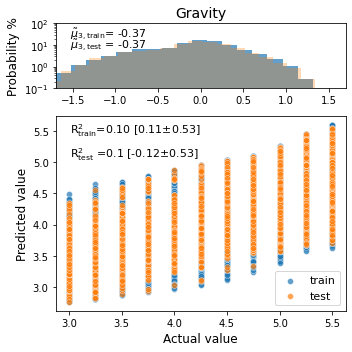

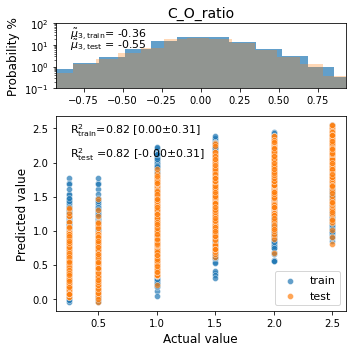

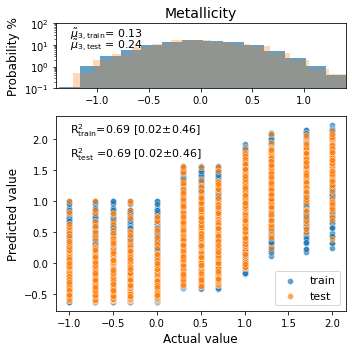

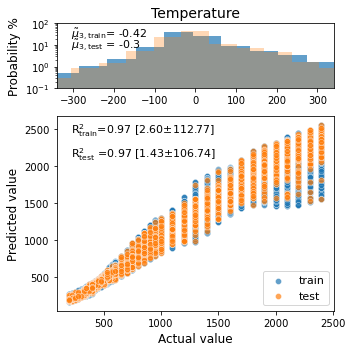

In [37]:
i = 1
regression_report(
        trained_model = train_cnn_model.trained_model,
        trained_data_processor = trained_Data_Processor,
        Xtrain = [trained_Data_Processor.X_train_standardized_rowwise[::i],
                  trained_Data_Processor.X_train_standardized_columnwise[::i]],
    
        Xtest  = [trained_Data_Processor.X_test_standardized_rowwise[::i], 
                  trained_Data_Processor.X_test_standardized_columnwise[::i]],
    
        ytrain = trained_Data_Processor.y_train_standardized_columnwise[::i],
    
        ytest  = trained_Data_Processor.y_test_standardized_columnwise[::i],
    
        target_i = 4,
        
        xy_top   = [0.05, 0.7],
        xy_bottom= [0.05, 0.85],
#         print_results = False,        
                 )